# Quantitative Finance with Python

### Alan Moreira, University of Rochester Simon Graduate School of Business

# Notebook 4




### Topics covered 
* * *
 * Portfolio math
 * Diversification
 * Mean-variance frontier
 * Tangency portfolio
 * Capital allocation line
 * Two-fund separation
 * Case study on international diversification

     

     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
url="C:/Users/Alan Moreira/Dropbox/Public/Fin418/Data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
df=Data[['RF','MKT']]

# Portfolio "Math"

### Portfolio weights

* The portfolio weight for stock j , denoted $w_j$, is the fraction of a portfolio value held in stock j

  * $w_j$=(Dollar held in stock j)/(Dollar value of portfolio)
  
* By construction, the portfolio weights allways add up to one: you invest all you got somewhere, and nothing more 

  * This doesn't mean that you can't borrow to invest, just means that you will have a negative weight somewhere offsetting the positive position in the other assets 
 
   $$\sum_{j=1}^N w_j=1$$
  
  * In matrix notation 
  
  $$1'W=1$$
  
  * where 1 is a N by 1 vector of 1's (i.e. a vector with entry 1 in ach position) and W is the N by 1 vector of portfolio weights

### Portfolio returns

$$ R_p=\sum_{j=1}^N w_jR_j=W'R$$


* Where $R$ is the N by 1 vector of realized asset returns


For example:

This below is the vector of return realization for a particular date 

In [2]:
Data['1963-02']

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206


* Since the return on a portfolio is a weighted sum of the returns on the securities, we need to determine how the distribution of this sum of r.v. is related to the orignal distribution of eah r.v. (the individual securities returns).

* The analysis of portfolio risk becomes much simpler by assuming that returns are normal.

* This means we only need to worry about mean and variance (even if we care about these really bad tail events)

In [2]:
# lets start by constructing a equal-weigthed portfolio
W=np.ones(6)/6

W.shape



(6,)

In [4]:
W

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [5]:
Data.loc['9/2008'] @ W

Date
2008-09-30   -0.069352
dtype: float64

What do we do to construct the returns for all the months?

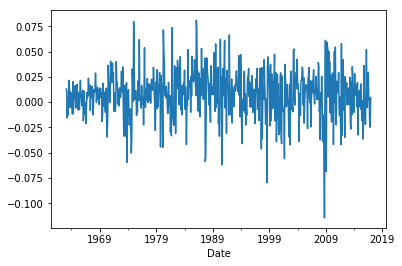

In [3]:

Rp=Data @ W
Rp.plot()

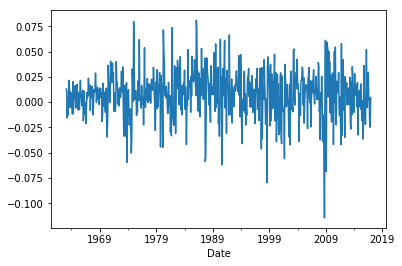

In [7]:
Rp.plot()

### Portfolio Expected returns

* The expected return of a portfolio is the portfolio weighted average of the expected returns of the individual assets.


$$E[R_p]=E[\sum_{j=1}^N w_jR_j]=\sum_{j=1}^N w_jE[R_j]=W'E[R]$$


> Can you use the definition of expected values we learn in notebook 3 to verify that this is correct?


* Lets compute for our EW portfolio:

In [9]:

W.T @ Data.mean()*12

0.08851259820401856

It should be true that taking the sample mean of our portfolio return realizations should give the same answer

In [10]:
Rp.mean()*12

0.08851259820401847

### Portfolio Variance

Two asset case:

$$Var(R_p)= Var(w_1R_1+w_2R_2)=Cov(w_1R_1+w_2R_2,w_1R_1+w_2R_2)$$

* where we used that $Var(x)=Cov(x,x)$

* We then distribute the terms

$$Cov(w_1R_1,w_1R_1+w_2R_2)+Cov(w_2R_2,w_1R_1+w_2R_2)=Cov(w_1R_1,w_1R_1)+Cov(w_2R_2,w_2R_2)+Cov(w_1R_1,w_1R_1)+Cov(w_2R_2,w_2R_2)$$

* This yields the classic formula

$$Var(R_p)= w_1^2Var(R_1)+2w_2w_1Cov(R_2,R_1)+w_2^2Var(R_2)$$

From the "term distribution"  above it is intuitive what the N asset case would look like


$$Var(R_p)= Var(\sum_{j=1}^N w_jR_j)=Cov(\sum_{j=1}^N w_jR_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N  w_j Cov(R_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(R_j, R_i)$$


* For a portfolio of 50 assets, this expression has 50 variance terms and 2450 covariance terms!

* Good thing we learned in Notebook 1 how to make this computation really easy

* We can write

$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(R_j, R_i)=W' Cov(R) W$$

* where $Var(R)$ is the N by N variance covariance matrix of the assets and W is the vector of weights


* Why is this?

$$Var(R_p)=Var(W'R)=Cov(W'R,W'R)=W'Cov(R,W'R)=(W'Cov(R,W'R))'=Cov(W'R,R)W=W'Cov(R)W$$

* Where we used that covariance is a linear operator(can take constants out of it, one at a time) and that it is symmetric(cov(x,y)=cov(y,x)), so the covariance is a symmetic matrix X'=X.



In [5]:
W.T@ Data.cov() @ W*12



0.006544740845712419

to get the volatility, i.e. , standard deviation:

In [6]:


(W.T@ Data.cov() @ W)**0.5

0.023353695006915604

Again, the in sample variance of the portfolio return realizations we constructed above should exactly match this:

In [9]:
Rp.std()*(3)**0.5

0.04044978629644543

> How do I get the daily volatility?

> How do I get weekly volatility?

> How do I get quartely volatility?

# Diversification

* A key concept in investing is diversification

* The famous: "don't put all your eggs in one basket" advice

* There are potential benefits of diversifcation for an investor when there are assets that  are imperfecly correlated with the investor portfolio

* So lets look at this from the vantage point of a US investors that is fully invested in the US equity market portfolio and is considering the benefits of investing in other world equity markets

In [10]:
# here is the co-movement across the asset
Data[['MKT','WorldxUSA']].corr()

,MKT,WorldxUSA
MKT,1.000000,0.611369
WorldxUSA,0.611369,1.000000


What is noteworth about this correlation matrix? 

Are there any benefits of diversification?

Lets compute how the variance the variance of the investor portfolio as she varies her portfolio weight on the world market

In [12]:
D=Data.loc[:,['MKT','WorldxUSA']]
UsW=[]
# w here is a vector of weights on the US MKT and 1-w is the the weight on the international market
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    print(W)
    UsW.append([1-x,(W.T @ D.cov() @ W)**0.5])
    



[0. 1.]
[0.05 0.95]
[0.1 0.9]
[0.15 0.85]
[0.2 0.8]
[0.25 0.75]
[0.3 0.7]
[0.35 0.65]
[0.4 0.6]
[0.45 0.55]
[0.5 0.5]
[0.55 0.45]
[0.6 0.4]
[0.65 0.35]
[0.7 0.3]
[0.75 0.25]
[0.8 0.2]
[0.85 0.15]
[0.9 0.1]
[0.95 0.05]
[1. 0.]


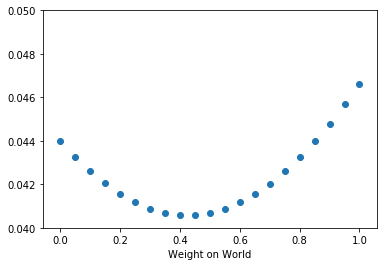

In [17]:
UsW=np.array(UsW)
plt.scatter(UsW[:,0],UsW[:,1])
plt.xlabel('Weight on World')
plt.ylim([0.04,0.05])
plt.show()

* We can also look at the investment frontier that such an investor faces: How her expected returns change with the variance

* Lets also look at annualized quantities for more intution

In [13]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    UsW.append([1-x,(W.T @ D.cov() @ W*12)**0.5,W.T @ np.array(D.mean())*12])
UsW=np.array(UsW)

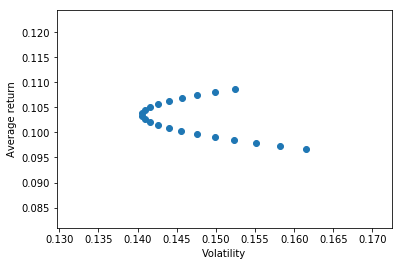

In [14]:
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()


* Can you tell which extreme dot corresponds to each asset?

* How can you find out easily? 

In [64]:
D.mean()*12

MKT          0.009052
WorldxUSA    0.008060
dtype: float64

In [66]:
D.std()*12**0.5

MKT          0.152431
WorldxUSA    0.161545
dtype: float64

* So it seems like that for some investors there is no diversification benefit?

* If you are a US investor and it is confortable with the US market volatlity, why would you ever invest in an asset of lower expected return?

* For the world investor, clearly they can benefit of holding a bit of the US market-and this does not depend on the preferences for risk as they can get higher returns and lower volatility through diversification

> Why might the US investor want to invest in th world market even if if has a lower expected return and higher variance?

# The Capital Allocation Line: Adding the Risk-free rate

* So far we looked at an investor that is fully invested across risky assets

* In this case, the only way that an investor can change the risk profile of her portfolio is by changing the relative weights across the risky assets

* In practice investors can invest in the risk-free asset, which has zero volatility. 

* This means that they can potentially derisk their portfolio by keeping the relative weights across assets constant and simply invest more in the risk-free asset

* So we will now work with excess returns (which we study in Notebook 3) and the risk-free rate, separating cleaning the risk-free component of these risky asset returns

In [15]:
# here are the excess returns R-rf
Re=(Data[['RF','MKT','WorldxUSA']]).subtract(Data['RF'],axis='index').drop('RF',axis=1)

Re.tail()

,MKT,WorldxUSA
Date,,
2016-08-31,0.0050,0.000638
2016-09-30,0.0025,0.012536
2016-10-31,-0.0202,-0.020583
2016-11-30,0.0486,-0.019898
2016-12-31,0.0182,0.034083


In [23]:
W.shape

(2,)

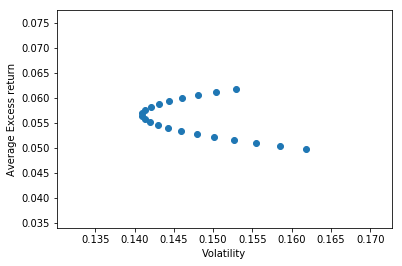

In [24]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    UsW.append([1-x,(W @ Re.cov() @ W*12)**0.5,W @ np.array(Re.mean())*12])
UsW=np.array(UsW)
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average Excess return')

plt.show()

### Using API's

* Pandas has an eco-system of APIs that allow you to get data from the web directly into a pandas dataframe

* Here we will look at one AP that gets macro and financial data from the Federal Reserve Bank of St louis

* Lots and lots of data!

https://fred.stlouisfed.org/categories

* Right now our goal is just to get the lastest risk-free rate

* Which in this case is the yield on the three month treasury bill



https://fred.stlouisfed.org/series/DTB3

* note that the fredapi is not in the anaconda eco-system so you install by openning anaconda Prompt 

* type "pip install fredapi"

* if it requires additional packages, install these packages to by tryping "pip install "name of required package"

* you will also need to apply for an API key here

https://research.stlouisfed.org/docs/api/api_key.html

* once you have it you use it to do this:

In [18]:

from fredapi import Fred
fred = Fred(api_key='f9207136b3333d7cf92c07273f6f5530')
data = fred.get_series('DTB3')


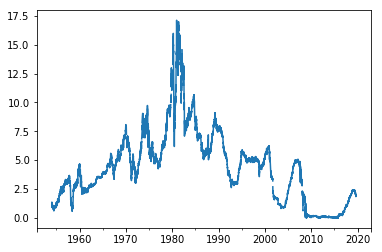

In [20]:
data.plot()

###  Lecture 6 9/11 ended here

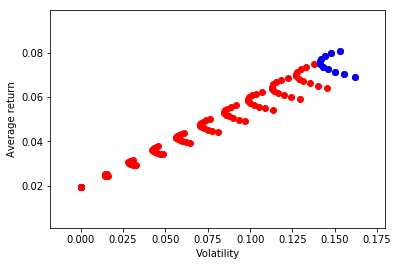

In [17]:
UsW=[]
w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)
rf=0.0192
for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])

        
UsW=np.array(UsW)
plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[0:11,2],UsW[0:11,3],color='blue')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* Why for excess returns do I use the sample average while for the risk-free rate I get the current one?

* What is noteworthy about this plot? What can you see in it?

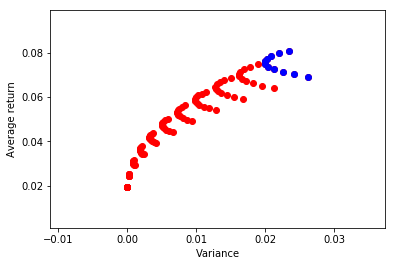

In [27]:
# in "variance space"

plt.scatter(UsW[:,2]**2,UsW[:,3],color='red')
plt.scatter(UsW[0:11,2]**2,UsW[0:11,3],color='blue')
plt.xlabel('Variance')
plt.ylabel('Average return')

plt.show()

* It is clear that someone that would like a lower risk profile can achieve this objective through the use of the risk-free asset without impat expected returns as much

* What about investors that would like to tak more risk, can they benefit of the risk-free asset?

* yes, if they can borrow at the risk-free rate

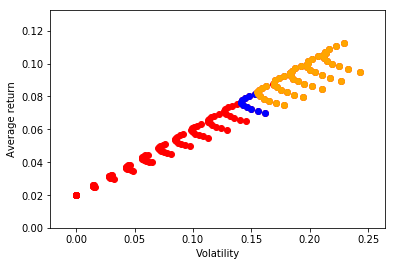

In [28]:
UsW=[]
w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)
rf=0.02
for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])

w=np.arange(0,1.1,0.1)
wf=np.arange(-0.5,0,0.1)
rf=0.02
for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W*12)**0.5,(W.T @ np.array(Re.mean())*12)*(1-xf)+rf])
        
        
UsW=np.array(UsW)
plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[0:11,2],UsW[0:11,3],color='blue')
plt.scatter(UsW[121:-1,2],UsW[121:-1,3],color='orange')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* What is the intepretation of a negative $w_f$?

* Is the investors likely to be able to borrtow at the risk-free rate?

# The mean-variance investment frontier and the Tangency portfolio

* Note the upper envelope that defines the "investment frontier", i.e., what is achiavable in terms of risk and returns

* If you are in this envelope, you know that in order to get less risk you will have to get less return

* There is no portfolio with a higher average return and the same volatility

* And no portfolio with the same expected return and lower volatility

* In volatility-expected return space all these portfolio are in a straight line, 

* Meaning that they achieve exactly the same ratio or expected excess return per unit of volatility since a stragith line has constant slope

* So all these portfolio have exactly the same Sharpe ratio ($\frac{E[R_p-R_f]}{std(R_p-R_f)}$), 

* This is also the maximum SR among all possible portfolios of the basis assets 

  *  (in this case only two: US and world portfolio)


> What these "efficient" portfolios look like?

* These portfolios all can be thought as minimizing variance/volatility for a given desired of expected returns 

* or maximizing expected returns for a given dislike of variance 

* Formally they solve the following minimization problem

$$
\begin{aligned}
minimize_{W,w_f} rf+ (1-w_f)E[W'R^e]- \gamma Var((1-w_f)W'R^e+w_fr_f)\\
minimize_{W,w_f} rf+ (1-w_f)W'E[R^e]- \gamma (1-w_f)^2W'Var(R^e)W\\
\end{aligned}
$$


* If you understand calculus the answer is immediate. 

* All you need is to take the derivative of the expression with respect to the risky portfolio weights $W$ :


$$(1-w_f)E[R^e]- 2\gamma(1-w_f)^2 Var(R^e)W$$

* and impose the "first order condition":
$$
\begin{aligned}
(1-w_f)E[R^e]- 2\gamma(1-w_f)^2 Var(R^e)W^*=0
\end{aligned}
$$

* which simply means that if $W^*$ is really the weight that maximizes the expression, if you move it a little bit in any direction, the value of the expression shouldn't move much

* In fact, for a tiny move in either direction, the benefit should be zero either way

* Here is the intuition:

  * Lets consider that we want to find the x that maximizes: $4x-x^2$  

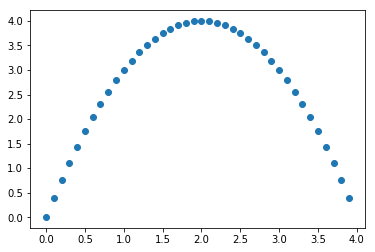

In [57]:
x=np.arange(0,4,0.1)
plt.scatter(x,4*x-x**2)

* This is maximized at 2

* The FOC for this case is simply

$$4-2x^*=0$$

* What means $x^*=2$

* You see in the plot that pertubating x a little bit has not effect on the value

* close to the optimal, the expression is flat.

* This is a general result 

# The Tangecy  portfolio



* Rewriting our first order condition we have


###  $$
\begin{aligned}
2\gamma(1-w_f)^2 Var(R^e)W^*=(1-w_f)E[R^e]\\
(2\gamma (1-w_f)^2Var(R^e))^{-1}2\gamma(1-w_f)^2 Var(R^e)W^*=(2\gamma (1-w_f)^2Var(R^e))^{-1}(1-w_f)E[R^e]\\
W^*=\frac{1}{2\gamma(1-w_f)}(Var(R^e))^{-1}E[R^e]
\end{aligned}$$


* Does your distaste for risk $\gamma$ impact your portfolio composition?

* Does it impact the relative weights in the risky assets?

* Does your choice of how much to invest in the risk-free asset $w_f$ impacts the composition of your risky portfolio?


* Note that $W^*$ is the optimal position in risky assets and therefore has the same dimension as the number of assets you are considering. 

* In our simple case 2 assets

* Note that $\frac{1}{2\gamma(1-w_f)}$ is a scalar, which means that this is a number not a vector

### Matrix inversion intuition

* Note that $(2)^{-1}=1/2=0.5$ (naturally!), $(Var(R^e))^{-1}$ is kind of like this, 

* but more complicated because $Var(R^e)$ is a N by N matrix and we can't simply divide over

* The definition of the inverse function is $f(x)=x^{-1}=y$ where $y*x=1$

* for matrixis it is the same: $(Var(R^e))^{-1}Var(R^e)=I$, but now instead of 1, we have an indentity matrix, which is matrix with 1's in the diagonal and zero everywhere else

* For a example, lets say we want to inverse a 2 by 2 matrix:

$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]^{-1}=\left[\begin{array}{cc}a & b\\c &d\end{array}\right]$$


* We would simply solve


$$\left[\begin{array}{cc}3 & 7\\0 &9\end{array}\right]\left[\begin{array}{cc}a & b\\c &d\end{array}\right]=I=\left[\begin{array}{cc}1 & 0\\0 &1\end{array}\right]$$

* Which means solving this system of four equations below
$$
\begin{aligned}
3*a+7*c=1\\
3*b+7*d=0\\
0*a+9*c=0\\
0*b+9*d=1\\
\end{aligned}$$

* which in this case has an easy solution [a,b,c,d]=[1/3,7/27,0,1/9]

* But we should be thankful for being born after the 70's, when people had to do these inversions by hand--for very large matrixes

* Now we can simply us the linear algebra library build in numpy  we discussed in Notebook 1 and invert the matrix:

In [59]:
np.linalg.inv(Re.cov()) 

array([[ 822.50792137, -476.49212708],
       [-476.49212708,  734.40580739]])

And our optimal weights must be proportional to 

In [29]:
Wstar=np.linalg.inv(Re.cov()) @ Re.mean()
Wstar

array([2.25099751, 0.597729  ])

* But these weigths don't add up to one?
* Why does this still make sense? Why these weights define a portfolio?

* Cacluating weights below for a fully invested portfolio

In [62]:

Wstar/np.sum(Wstar)

array([0.79017677, 0.20982323])

### Two-fund separation

* Take a moment to appreciate this.

* How you distribute your wealth across different risky assets DOES NOT depend on your preferences for risk!

* It DOES NOT depend on how much you are investing in the risk-free rate

* We can go back and now solve to the position in the risky-free asset and the risk portfolio

$$
\begin{aligned}
minimize_{w_f} rf+ (1-w_f)E[R^*]- (1-w_f)^2\gamma Var(R^*)\\
\end{aligned}
$$

* Where $R^*=(W^*)'R^e$ is the returns on the optimal risk portfolio (the TANGENCY portfolio)

* The First order condition for $w_f$ is simply


$$
\begin{aligned}
-E[R^*]+ 2(1-w_f)\gamma Var(R^*)=0\\
 (1-w_f)=\frac{1}{2\gamma}\frac{E[R^*]}{Var(R^*)}
\end{aligned}
$$

* Note that now we can divided over the variance term, becasue tat is the variance of one asset, our portfolio, whihc is just a scalar

* Recall that $1-w_f$ is the position of the optimal risky portfolio (the TANGENCY portfolio)

* So this formula has a lot of intuition:

  * Your position on the risky portfolio depends:
    * on your distaste for risk $(2\gamma)$ 
    * The risk-return trade-off on your  risky portfolio
    * Recall that the optimal risky portfolio is the portfolio with best risk-return trade-off !
    
* You can also rewrite the solution in terms of your choice of your overall portfolio volatility, 

* which is $(1-w_f)std(R^*)$
  
  $$ (1-w_f)std(R^*)=\frac{1}{2\gamma}\frac{E[R^*]}{std(R^*)}$$
  
* So your position on the risky asset depends on the Sharpe ratio of your risky portfolio
  
* Note that we can simply define the tangency portfolio as : 

$$W^*=(Var(R^e))^{-1}E[R^e]$$

* Because any constant term will simply change the position in the risky-free asset

* For example, since any constant multiplying $W^*$ does not change it's sharpe ratio (can you show that?), 

* then from the equation above it is immediate that a more volatile $R^*$ would simply imply a higher position in the risk-free asset, keeping the total portfolio volatility constant. 

### The tangency portfolio and the cross-sectional of expected returns


* The optimal condition for our tangency portfolio:

$$ Var(R^e)W^*=cte*E[R^e]$$

* This condition above defines the tangency portfolio

* We can rewirte the left hand side as

$$Var(R^e)W^*=Cov(R^e,R^e)W^*=Cov(R^e,(W^*)'R^e)=Cov(R^e,R^*)$$

* The left-hand side in the covariance vector of all the assets with the tangency portfolio

* This means that expected returns of each asset must be proportional to the asset return covariance with the tangency portfolio

$$ E[R^e]=cte Cov(R^e,R^*) $$


* This holds for all assets in your investment opportunity set (i.e. the assets included in the minimization problem that the tangency portfolio solves)


* This means that for any assets $j$ and $i$ we have 


$$\frac{E[R^e_i]}{Cov(R^e_i,R^*)}= \frac{E[R^e_j]}{Cov(R^e_j,R^*)} $$ 


* All assets have the same expected return per-unit of covariance with the tangency portoflio

* We can also apply this to the tangency portfolio itself


$$ E[R^*]=cte Cov(R^*,R^*) $$


* Which means that $cte=\frac{E[R^*]}{Var(R^*)}$


* Pluggin back in the original and we get that for any asset $j$


$$ E[R^e_j]=\frac{E[R^*]}{Var(R^*)} Cov(R^e_j,R^*) =\frac{Cov(R^e_j,R^*)}{Var(R^*)}E[R^*]=\beta_{j,*}E[R^*] $$



$$ E[R^e_j]=\beta_{j,*}E[R^*] $$

> What does that reminds you?

* All the information about the cross-sectional of expected returns--all the assets-- can be summarized by the expected return of the tangency portfolio and the beta of each asset with respect to the tangency portfolio

* Or Alternatively: the risk-return trade-off  of the tangency portfolio  $\frac{E[R^*]}{Var(R^*)}$ and the covariance of each asset with it.


* Once you have the right notion of risk, the reward to risk is the same across assets (no free lunch)

* What is the right notion? Covariance with the tangency portfolio

* In sample that you estimated the moments this will be true by construction!

In [69]:
mu_star=Wstar @ Re.mean()
var_star=(Wstar @ Re.cov() @ Wstar.T)
cov=Wstar @ Re.cov()

predicted= mu_star/var_star*cov

print(predicted)

print(Re.mean())

[0.00514034 0.00414901]
MKT          0.005140
WorldxUSA    0.004149
dtype: float64


* This comes form the fact that the tangency portfolio was constructed to be the portfolio with the maximum Sharpe Ratio
* It is a result of us knowing the moments of all assets summarized by $E[R^e]$  and $Var(R^e)$
* Here we did everything IN SAMPLE. We used sample moments and evalauted it's predictions using the same sample
* The challenge is that these moments are not always well estiamted, to put it mildly (more on this soon!)
* So the in sample tangency portfolio might not be very informative about the true tangency portfolio, which is the one that we actually care about

> Why? Because it can predict returns going forward and not only in sample (which is useless)

### Portfolio advice summary

* All investors invest in the same fund of risky assets, regardless of risk aversion.

* Depending on risk aversion, they choose an appropriate mix of money market and risky fund investments

* What about the investment horizon? 

* Same portfolio advice applies for investors with longer horizons if we assume that investors are drawn from the same distribution each period

* Your investment horizon (age) does not matter if returns are i.i.d. (independently and identically distributed over time)

### The 1 trillion dollar question: What is the Tangency portfolio? How to find it?


# Case study on international portfolio diversification

In [30]:
Data.head()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [31]:
# for convenience lets rename these assets

Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data.tail()

,RF,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,,
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
2016-11-30,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
2016-12-31,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [32]:
# lets start by constructing a matrix with only excess returns
Re=(Data.drop('RF',axis=1)).subtract(Data['RF'],axis='index')
Re.tail()

,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676
2016-11-30,0.0486,-0.081736,-0.046071,-0.019898,-0.050459
2016-12-31,0.0182,-0.005596,0.002604,0.034083,-0.023507


In [34]:
# now we estimate the expected return and the covariance using the sample moments
ERe=Re.mean()
ERe

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002052
dtype: float64

In [35]:
Cove=Re.cov()
Cove

,MKTUS,BondUS,EM,MKTxUS,BondxUS
MKTUS,0.001948,0.000111,0.001292,0.001264,0.000187
BondUS,0.000111,0.001227,-0.000204,-0.000013,0.000264
EM,0.001292,-0.000204,0.003556,0.001661,0.000248
MKTxUS,0.001264,-0.000013,0.001661,0.002182,0.000422
BondxUS,0.000187,0.000264,0.000248,0.000422,0.000406


1. First we will solve for the maxium Sharpe ratio feasible: 

What is this? It is the SR on the tangency  portfolio

(I am using $W_*$ to denote it to make it easier to show the transposes)
  
  

$$
\begin{aligned}
SR(R^*)=\frac{E[W_*'R^e]}{\sqrt{Var(W_*'R^e)}}\\
=\frac{W_*'E[R^e]}{\sqrt{W_*'Var(R^e)W_*}}\\
=\frac{(Var(R^e)^{-1}E[R^e])'E[R^e]}{\sqrt{(Var(R^e)^{-1}E[R^e])'Var(R^e)(Var(R^e)^{-1}E[R^e])}}\\
=\frac{E[R^e]'Var(R^e)^{-1}E[R^e]}{\sqrt{E[R^e]Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]}}\\
=\frac{E[R^e]'Var(R^e)^{-1}E[R^e]}{\sqrt{E[R^e]Var(R^e)^{-1}E[R^e]}}\\
=\sqrt{E[R^e]Var(R^e)^{-1}E[R^e]}
\end{aligned}$$

2. Then we will solve for the weights that implement this Sharpe ratio

$$VAR(R)^{-1}E[R]$$

3. And then we will solve for the position on it that implements a desired level of expected excess returns

In [36]:
SR_int=(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values)**0.5
SR_int

0.16369789630430479

In [37]:
# annualized

SR_int*12**0.5

0.5670661469823949

In [40]:
# compares with market

Re.MKTUS.mean()/Re.MKTUS.std()*12**0.5

0.40345097267659175

In [41]:
# construct the optimal weights
Wmve=pd.DataFrame([],index=Re.columns)
Wmve['wghts0'] =np.linalg.inv(Cove) @ ERe.values

Wmve


,wghts0
MKTUS,1.834995
BondUS,1.423872
EM,1.605498
MKTxUS,-1.026051
BondxUS,3.368940


To find the weights that implement a particular expected return target 

$$\mu^{target}=r_f+(1-w_f)E[R^*]$$

$$(1-w_f)=\frac{\mu^{target}-r_f}{E[R^*]}$$

$$(1-w_f)=\frac{\mu^{target}-r_f}{E[R^e]'Var(R^e)^{-1}E[R^e]}$$


> How to choose $w_f$ by targeting a desired level of vol?

In [42]:
# target ER

mu_target=0.01
lamb=(mu_target/(ERe.values.T @ np.linalg.inv(Cove) @ ERe.values))
print(lamb)
# must 
Wmve['Wgths1']=lamb*(np.linalg.inv(Cove) @ ERe.values)
Wmve

0.37317608433285165


,wghts0,Wgths1
MKTUS,1.834995,0.684776
BondUS,1.423872,0.531355
EM,1.605498,0.599134
MKTxUS,-1.026051,-0.382898
BondxUS,3.368940,1.257208


lets compute the domestic mean-variance frontier

(we only keep the first two columns MKT +Bonds)

In [43]:

ERdom=Re[['MKTUS','BondUS']].mean()
Covdom=Re[['MKTUS','BondUS']].cov()
SR_dom=(ERdom.values.T @ np.linalg.inv(Covdom) @ ERdom.values)**0.5
print(SR_dom*12**0.5)
Wmvedom= np.linalg.inv(Covdom) @ ERdom.values
Wmve.loc[['MKTUS','BondUS'],'wghtsdom']=Wmvedom
Wmve

0.46009875470841877


,wghts0,Wgths1,wghtsdom
MKTUS,1.834995,0.684776,2.534954
BondUS,1.423872,0.531355,1.827591
EM,1.605498,0.599134,NaN
MKTxUS,-1.026051,-0.382898,NaN
BondxUS,3.368940,1.257208,NaN


* To get a bit of intuition we can normalize the weights to add up to 1

* Why these weights do not have to add up to 1?

* Why is ok to normalize to 1?

* What changes when we do that? What does not change?



In [193]:

Wmve/Wmve.sum()

,wghts0,Wgths1,wghtsdom
MKTUS,0.254604,0.254604,0.581072
BondUS,0.197561,0.197561,0.418928
EM,0.222761,0.222761,NaN
MKTxUS,-0.142364,-0.142364,NaN
BondxUS,0.467437,0.467437,NaN


In [44]:
# this difference is the benefits of international diversification

SR_int-SR_dom

0.030878826361946193

- what does that mean?

- it means for example that if you want to target a portfolio with a volatility of 5% per month (about the vol of the US market portfolio), then you get  


In [195]:
# international diversification
voltarget=0.05
[SR_int*voltarget,SR_dom*voltarget]


[0.008184894815215239, 0.00664095349711793]

In [196]:
# annualized  your returns increase by 
(SR_int*voltarget -SR_dom*voltarget)*12

0.018527295817167708

In [197]:
# in percentual increase it is very meaningful
(SR_int*voltarget -SR_dom*voltarget)/(SR_dom*voltarget)

0.2324878978248162

### The mean-variance frontier in it's full glory

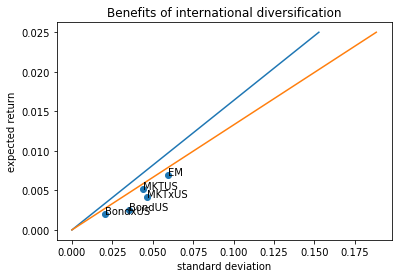

In [45]:
# Lets visualize this in a plot the two investment frontiers

# set different expected return targets
mu_target=np.linspace(0,0.025,20)
# international portfolios
STD_MVE_int=(Wmve['wghts0'] @ Cove @ Wmve['wghts0'].T)**0.5
lam=mu_target/(SR_int**2)
STD_target_int=lam*STD_MVE_int

# do the plot
plt.plot(STD_target_int,mu_target)

#Domestic portfolios
STD_MVE_dom=(Wmve.loc[['MKTUS','BondUS'],'wghtsdom'] @ Covdom @ Wmve.loc[['MKTUS','BondUS'],'wghtsdom'].T)**0.5
STD_target_dom=mu_target/(SR_dom**2)*STD_MVE_dom
plt.plot(STD_target_dom,mu_target)
plt.scatter(Re.std(),Re.mean())

# lets add some labels so we know which point is each portfolio
# First time that I use loop? If yes discuss

for label in Re.columns :
   plt.text(Re.std()[label],Re.mean()[label],label)

plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Benefits of international diversification')
plt.show()